In [1]:
import os
import sys
import fasttext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neattext.functions as nfx
import requests

module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

ModuleNotFoundError: No module named 'numpy'

In [ ]:
climat_topics=['T10753', 'T11988', 'T10122', 'T10139', 'T10577', 'T11862', 'T13377', 'T10898', 'T12981', 'T10174', 'T11405', 'T13396', 'T12213', 'T12639', 'T11056', 'T11880', 'T11753', 'T10439', 'T10766', 'T10438', 'T12806', 'T11244', 'T11186', 'T10029', 'T11588', 'T10075', 'T10017', 'T10644', 'T10895', 'T10266', 'T10230', 'T11320', 'T10341', 'T10005', 'T10347', 'T10765', 'T10032', 'T11333', 'T10226', 'T10466', 'T10647', 'T11483', 'T10330', 'T10471', 'T10199', 'T10555', 'T11259', 'T11594', 'T10643', 'T10319', 'T10487', 'T10435', 'T10659', 'T10089','T10255', 'T11088', 'T10930', 'T12073', 'T11459', 'T11061', 'T10302', 'T10190', 'T10779', 'T10535', 'T12617', 'T12414', 'T10166', 'T10004', 'T10889', 'T11913', 'T10398', 'T11760']


In [ ]:
climat_topics_str=['climate change','marine ecosystems','ecology','ecological','environmental','methane emission','ocean acidification','arctic sea ice','environmental impact','climate ethics','hydrological cycle','energy transition','influence of climate','urban heat islands','mitigation strategies','impact on climate','environmental policies','carbon dioxide capture','carbon dioxide storage','soil carbon dynamics','sustainable development','environmental governance','atmospheric aerosols','marine biogeochemistry','biodiversity','global flood risk','arctic sea ice','ocean surface waves and wind interaction','aeolian geomorphology','wind erosion dynamics','coastal protection','water resource management','air pollution','deforestation','energy efficiency','global drought','landslide hazards','paleoclimat',"climate resilience", "climate adaptation", "carbon footprint", "carbon neutrality", "climate mitigation", "climate models", "climate scenarios", "zero emissions", "renewable energy", "sustainable agriculture", "ecosystem services", "climate vulnerability", "climate impacts", "climate policy", "global warming", "low-carbon", "climate change adaptation strategies", "ecosystem-based adaptation", "climate finance", "fossil fuel phase-out", "carbon trading", "climate-induced displacement", "environmental resilience", "greenhouse gas emissions", "land-use change", "climate risk assessment", "climate-induced migration", "carbon sequestration", "bioenergy", "energy transition pathways", "climate justice", "climate-sensitive diseases", "adaptation planning", "geoengineering", "flood management", "ecosystem restoration", "heat stress", "mitigation", "carbon pricing", "sustainable forestry", "blue carbon", "adaptation and resilience building","green infrastructure", "climate", "urban adaptation strategies", "climate-smart agriculture", "drought mitigation", "weather extremes", "ocean conservation", "green energy" "floodplain management", "temperature rise mitigation"]
climat_topics_str=['"'+str(x)+'"' for x in climat_topics_str if str(x).find(' ')>=0]+[str(x) for x in climat_topics_str if str(x).find(' ')==-1]

In [ ]:
climat_topics_OR=('|').join(climat_topics)
climat_topics_OR_str=(' OR ').join(climat_topics_str)

In [5]:
climat_topics_OR_str

'"climate change" OR "marine ecosystems" OR "methane emission" OR "ocean acidification" OR "arctic sea ice" OR "environmental impact" OR "climate ethics" OR "hydrological cycle" OR "energy transition" OR "influence of climate" OR "urban heat islands" OR "mitigation strategies" OR "impact on climate" OR "environmental policies" OR "carbon dioxide capture" OR "carbon dioxide storage" OR "soil carbon dynamics" OR "sustainable development" OR "environmental governance" OR "atmospheric aerosols" OR "marine biogeochemistry" OR "global flood risk" OR "arctic sea ice" OR "ocean surface waves and wind interaction" OR "aeolian geomorphology" OR "wind erosion dynamics" OR "coastal protection" OR "water resource management" OR "air pollution" OR "energy efficiency" OR "global drought" OR "landslide hazards" OR "climate resilience" OR "climate adaptation" OR "carbon footprint" OR "carbon neutrality" OR "climate mitigation" OR "climate models" OR "climate scenarios" OR "zero emissions" OR "renewable

In [6]:
climat_topics_OR

'T10753|T11988|T10122|T10139|T10577|T11862|T13377|T10898|T12981|T10174|T11405|T13396|T12213|T12639|T11056|T11880|T11753|T10439|T10766|T10438|T12806|T11244|T11186|T10029|T11588|T10075|T10017|T10644|T10895|T10266|T10230|T11320|T10341|T10005|T10347|T10765|T10032|T11333|T10226|T10466|T10647|T11483|T10330|T10471|T10199|T10555|T11259|T11594|T10643|T10319|T10487|T10435|T10659|T10089|T10255|T11088|T10930|T12073|T11459|T11061|T10302|T10190|T10779|T10535|T12617|T12414|T10166|T10004|T10889|T11913|T10398|T11760'

In [7]:
year=2023
url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:{year},topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str})&group-by=institutions.country_code"
response = requests.get(url)
data = response.json()

In [8]:
data#['meta']['count']

{'meta': {'count': 183271,
  'db_response_time_ms': 2107,
  'page': 1,
  'per_page': 200,
  'groups_count': 200},
 'group_by': [{'key': 'https://openalex.org/countries/CN',
   'key_display_name': 'China',
   'count': 37377},
  {'key': 'https://openalex.org/countries/US',
   'key_display_name': 'United States of America',
   'count': 32752},
  {'key': 'https://openalex.org/countries/GB',
   'key_display_name': 'United Kingdom of Great Britain and Northern Ireland',
   'count': 14332},
  {'key': 'https://openalex.org/countries/DE',
   'key_display_name': 'Germany',
   'count': 12203},
  {'key': 'https://openalex.org/countries/IN',
   'key_display_name': 'India',
   'count': 8185},
  {'key': 'https://openalex.org/countries/FR',
   'key_display_name': 'France',
   'count': 7643},
  {'key': 'https://openalex.org/countries/AU',
   'key_display_name': 'Australia',
   'count': 7520},
  {'key': 'https://openalex.org/countries/IT',
   'key_display_name': 'Italy',
   'count': 7448},
  {'key': 'ht

In [12]:
dict_countries=[]

for year in range(2013,2024,1):
    url=f"https://api.openalex.org/works?filter=has_doi:true,publication_year:{year},topics.id:{climat_topics_OR},title_and_abstract.search:({climat_topics_OR_str})&group-by=institutions.country_code"
    response = requests.get(url)
    data = response.json()
    for i in range(0,15,1):
        dict_countries.append({"year":str(year),'country':data['group_by'][i]['key'].replace('https://openalex.org/countries/',''),'count':data['group_by'][i]['count'],'total':data['meta']['count'], 'rank': i+1})

In [13]:
df=pd.DataFrame(dict_countries)
df['percentage']=df.apply(lambda row: round(row['count']*100/row['total'],1),axis=1)

In [26]:
df[df.year=='2020']

,year,country,count,total,rank,percentage
105,2020,US,28653,124594,1,23.0
106,2020,CN,18308,124594,2,14.7
107,2020,GB,11461,124594,3,9.2
108,2020,DE,9061,124594,4,7.3
109,2020,AU,6492,124594,5,5.2
110,2020,FR,6237,124594,6,5.0
111,2020,CA,6043,124594,7,4.9
112,2020,IT,5286,124594,8,4.2
113,2020,ES,5104,124594,9,4.1
114,2020,BR,4213,124594,10,3.4


In [29]:
list(df[df.country=='ES']['rank'])

[8, 8, 9, 9, 9, 8, 8, 9, 9, 10, 10]

In [182]:
df=pd.DataFrame(dict_countries)

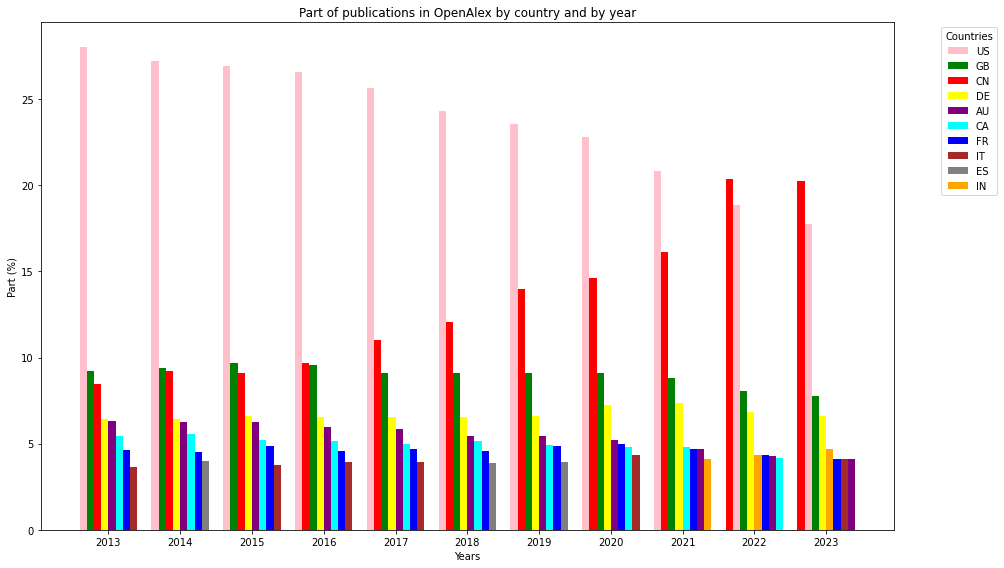

In [188]:
years = df['year'].unique()

color_dict = {
    'US': 'pink',
    'GB': 'green',
    'CN': 'red',
    'DE': 'yellow',
    'AU': 'purple',
    'CA': 'cyan',
    'FR': 'blue',
    'IN': 'orange',
    'IT': 'brown'
}

bar_width = 0.1
index = np.arange(len(years)) 
fig, ax = plt.subplots(figsize=(14, 8))

used_countries = set() 
for i, year in enumerate(years):
    year_data = df[df['year'] == year]
    
    top_8_countries = year_data.nlargest(8, 'count')['country']
    year_data_top_8 = year_data[year_data['country'].isin(top_8_countries)]
    
    for j, country in enumerate(top_8_countries):
        country_data = year_data_top_8[year_data_top_8['country'] == country]
        
        color = color_dict.get(country, 'gray')
        
        bar = ax.bar(index[i] + j * bar_width, country_data['percentage'], bar_width, label=country if country not in used_countries else "", color=color)
        
        if country not in used_countries:
            used_countries.add(country)

ax.set_xlabel('Years')
ax.set_ylabel('Part (%)')
ax.set_title('Part of publications in OpenAlex by country and by year')
ax.set_xticks(index + bar_width * 3.5)
ax.set_xticklabels(years)
ax.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

with Highcharts

In [2]:
# pip install virtualenv
# virtualenv -p python3.10 myenv
# myenv\Scripts\activate
# pip install highcharts_core

In [10]:
from highcharts_core.chart import Chart
from highcharts_core.options import HighchartsOptions
from highcharts_core.options.plot_options import PlotOptions
from highcharts_core.options.axes.x_axis import XAxis
from highcharts_core.options.axes.y_axis import YAxis,YAxisTitle
from highcharts_core.options.axes.accessibility import AxisAccessibility
from highcharts_core.options.axes.title import AxisTitle
from highcharts_core.options.title import Title
from highcharts_core.options.subtitle import Subtitle
from highcharts_core.options.legend import Legend
from highcharts_core.options.plot_options.series import SeriesOptions
from highcharts_core.options.series.area import LineSeries
from highcharts_core.options.series.labels import SeriesLabel
from highcharts_core.options.responsive import Responsive, ResponsiveRules, Condition
from highcharts_core.constants import EnforcedNull

In [11]:
chart_options = HighchartsOptions(
    title = Title(text = 'Rank for 10 countries by year in OpenAlex publications',
                  align = 'left'),
    subtitle = Subtitle(text = 'Source: <a href="https://irecusa.org/programs/solar-jobs-census/" target="_blank">OpenAlex</a>',
                        align = 'left'),
    y_axis = YAxis(title = YAxisTitle(text = 'Rank'), reversed=True, min=1),
    x_axis = XAxis(
        accessibility = AxisAccessibility(range_description = 'Range: 2013 to 2023')
    ),
    legend = Legend(layout = 'vertical',
                    align = 'right',
                    vertical_align = 'middle'),
    plot_options = PlotOptions(series = SeriesOptions(point_start = 2013,
                                                      label = SeriesLabel(connector_allowed = False)))
)

In [12]:
override_options = HighchartsOptions(legend = Legend(layout = 'horizontal',
                                                     align = 'center',
                                                     vertical_align = 'bottom'))
responsive_config = Responsive(
    rules = [
        ResponsiveRules(chart_options = override_options,
                        condition = Condition(max_width = 500))
    ]
)
chart_options.responsive = responsive_config

In [13]:
series1 = LineSeries(name = 'US',
                     data = [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])
series2 = LineSeries(name = 'GB',
                     data = [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
                    color = 'green')
series3 = LineSeries(name = 'CN',
                     data = [3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1],
                     color = 'red')
series4 = LineSeries(name = 'DE',
                     data = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
                     color= 'purple')
series5 = LineSeries(name = 'FR',
                     data = [7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 6],
                     color = 'blue')
series6 = LineSeries(name = 'IN',
                     data = [15, 13, 13, 13, 11, 12, 11, 11, 10, 8, 5],
                     color = 'orange')
series7 = LineSeries(name = 'AU',
                     data = [5, 5, 5, 5, 5, 5, 5, 5, 7, 6, 7],
                     color = 'grey')
series8 = LineSeries(name = 'CA',
                     data = [6, 6, 6, 6, 6, 6, 6, 7, 5, 7, 9],
                     color = 'brown')
series9 = LineSeries(name = 'IT',
                     data = [9, 9, 8, 8, 8, 9, 9, 8, 8, 9, 8],
                     color = 'green')
series10 = LineSeries(name = 'ES',
                     data = [8, 8, 9, 9, 9, 8, 8, 9, 9, 10, 10],
                     color = 'yellow')

chart_options.add_series(series1, series2, series3, series4, series5, series6, series7,series8,series9,series10)

In [14]:
chart = Chart.from_options(chart_options)
chart.display()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>